<img style="float: left;" src="pic2.png">

### Sridhar Palle, Ph.D, spalle@emory.edu (Applied DS & ML with Python Program)

# Supervised Machine Learning with Sklearn

## (Classification : Breast Cancer Prediction)

<img style = 'float:left;' src=bmass.png>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

## 1. Data Collection

In [2]:
from sklearn import datasets

In [3]:
[dset for dset in dir(datasets) if 'load_' in dset]

['load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_mlcomp',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine']

**Import and load dataset**

In [4]:
bcancer = datasets.load_breast_cancer()

**Initial exploration of the breast cancer dataset**

In [5]:
bcancer.keys() # Take a look at the keys

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
bcancer['feature_names']  # Peek at the feature names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
print (bcancer['DESCR']) # Read the description

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

**Convert the data into a dataframe, and assign columns**

In [8]:
bcancer_df = pd.DataFrame(bcancer['data'], columns = bcancer['feature_names'])
bcancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [9]:
bcancer_df.shape

(569, 30)

**Add the target variable column to the bcancer_df data frame**

In [10]:
bcancer_df['diagnosis'] = bcancer['target']
bcancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


## 2. Data Exploration and Visualization

In [11]:
bcancer_df.shape

(569, 31)

In [12]:
bcancer_df['diagnosis'].value_counts() # check the benign (357) and malignant cases (212)

1    357
0    212
Name: diagnosis, dtype: int64

In [13]:
bcancer_df['diagnosis'] = 1 - bcancer_df['diagnosis']
bcancer_df['diagnosis'].value_counts() # check the benign (357) and malignant cases (212)

0    357
1    212
Name: diagnosis, dtype: int64

In [14]:
bcancer_df.info() # get some basic info on each variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [15]:
bcancer_df.describe() # to see some statistics

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


**Get a correlation Plot**

In [16]:
corm = bcancer_df.iloc[:,:-1].corr()
masko = np.zeros_like(corm, dtype = np.bool)
masko[np.triu_indices_from(masko)] = True

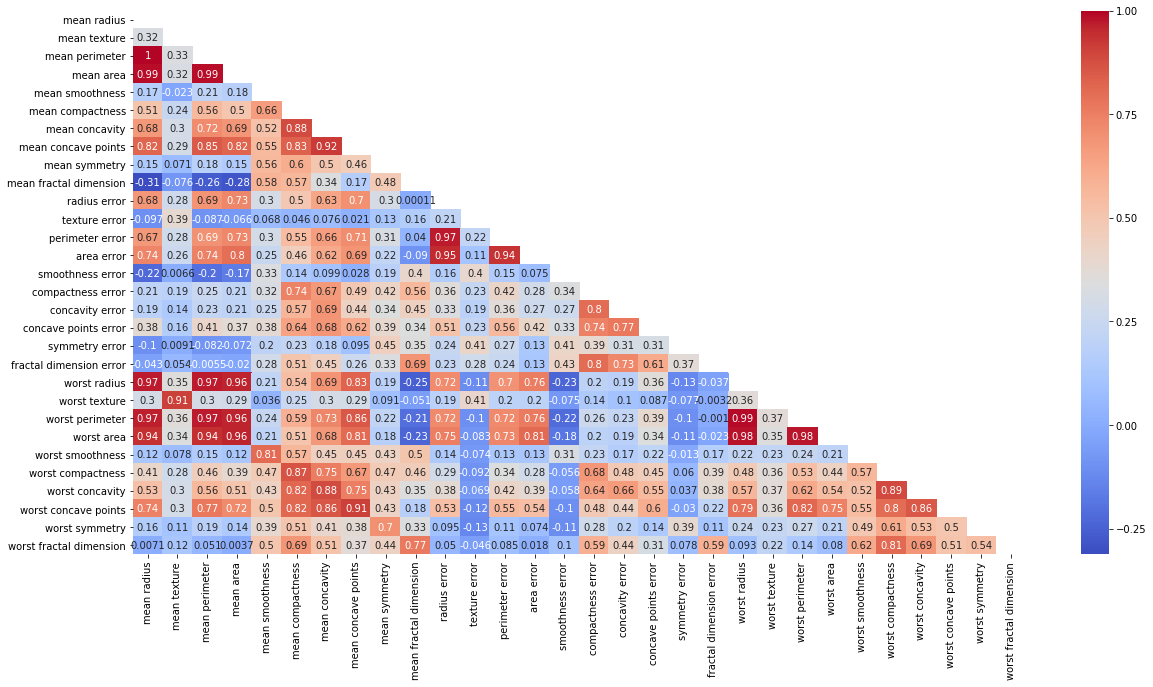

In [17]:
fig, ax = plt.subplots(figsize = (20,10))
sns.heatmap(corm, mask = masko, cmap = 'coolwarm', annot=True)

## 3. Data Preparation

In [18]:
# If there are any data preperation steps, like removing columns, missing values, imputation etc.

**Seperate independent variables into a X data frame, and target variable into y series.**

In [19]:
X = bcancer_df.loc[:,bcancer_df.columns != 'diagnosis']
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
y = bcancer_df.loc[:,'diagnosis']

## 4. Train/Test Split

In [21]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)

## 5. Apply Machine Learning models for Classification

### 5.0 Dummy Classifier

In [25]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, accuracy_score

dummy = DummyClassifier(strategy = 'most_frequent', random_state=0)
dummy.fit(X_train, y_train)

ydummy_train = dummy.predict(X_train)
ydummy_train[0:5] # Most frequent case is 0 (Benign)

array([0, 0, 0, 0, 0])

**Confusion matrix on dummy classifier**

In [26]:
ydummy_test = dummy.predict(X_test)
print ('Confusion matrix for DummyClassifier is : \n \n', confusion_matrix(y_test,ydummy_test))

Confusion matrix for DummyClassifier is : 
 
 [[91  0]
 [52  0]]


**Accuracy score of dummy classifier**

In [27]:
print ('Accuracy score for DummyClassifier is : \n \n', accuracy_score(y_test, ydummy_test))

Accuracy score for DummyClassifier is : 
 
 0.6363636363636364


### 5.1 Logistic Regression

**Train a logistic regression model on the training data**

In [28]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(random_state=0)
logr.fit(X_train, y_train)

C:\Users\palle\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

**Predictions, Confusion matrix, & scores**

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

ypred_train_logr = logr.predict(X_train)
ypred_test_logr = logr.predict(X_test)

print ('First 8 Predictions for training data are: ', ypred_train_logr[:8])
print ('First 8 Predictions for test data are: ', ypred_test_logr[:8])

First 8 Predictions for training data are:  [0 0 1 0 0 0 0 1]
First 8 Predictions for test data are:  [1 0 0 1 0 0 0 1]


In [30]:
print ('confusion matrix for training data is : \n', confusion_matrix(y_train,ypred_train_logr), '\n', '\n')
print ('confusion_matrix for test data is : \n', confusion_matrix(y_test,ypred_test_logr), '\n')

confusion matrix for training data is : 
 [[259   7]
 [ 11 149]] 
 

confusion_matrix for test data is : 
 [[85  6]
 [ 3 49]] 



**Accuracy, Recall & Precision**

**On Training Data**

In [31]:
print ('Accuracy for train data is : \n', accuracy_score(y_train,ypred_train_logr), '\n')
print ('Recall for train data is : \n', recall_score(y_train,ypred_train_logr), '\n')
print ('Precision for train data is : \n', precision_score(y_train,ypred_train_logr), '\n')
print ('f1-score for train data is : \n', f1_score(y_train,ypred_train_logr), '\n')

Accuracy for train data is : 
 0.9577464788732394 

Recall for train data is : 
 0.93125 

Precision for train data is : 
 0.9551282051282052 

f1-score for train data is : 
 0.9430379746835443 



**On Test Data**

In [32]:
print ('Accuracy for test data is : \n', accuracy_score(y_test,ypred_test_logr), '\n')
print ('Recall for test data is : \n', recall_score(y_test,ypred_test_logr), '\n')
print ('Precision for test data is : \n', precision_score(y_test,ypred_test_logr), '\n')
print ('f1-score for test data is : \n', f1_score(y_test,ypred_test_logr), '\n')

Accuracy for test data is : 
 0.9370629370629371 

Recall for test data is : 
 0.9423076923076923 

Precision for test data is : 
 0.8909090909090909 

f1-score for test data is : 
 0.9158878504672897 



### 5.2 Predicting actual probabilities using .predict_proba method

In [44]:
yprob_test_logr = logr.predict_proba(X_test)
yprob_test_logr[0:9,:].round(3) # Probabilities that the target variable is 0, 1

array([[0.008, 0.992],
       [1.   , 0.   ],
       [0.998, 0.002],
       [0.   , 1.   ],
       [0.995, 0.005],
       [0.962, 0.038],
       [0.999, 0.001],
       [0.304, 0.696],
       [0.   , 1.   ]])

**probability that the target variable is 1**

In [45]:
yprob_test_logr[0:9,1].round(decimals=3)

array([0.992, 0.   , 0.002, 1.   , 0.005, 0.038, 0.001, 0.696, 1.   ])

**Default target variable predicted by the .predit method**

In [46]:
ypred_test_logr[0:9]

array([1, 0, 0, 1, 0, 0, 0, 1, 1])

**Original confusion matrix by using predictions from .predict method**

In [47]:
confusion_matrix(y_test,ypred_test_logr) # Confusion matrix when threshold was default value of 0.5

array([[85,  6],
       [ 3, 49]], dtype=int64)

**Confusion matrix by varying threshold value to make predictions**

In [58]:
confusion_matrix(y_test,yprob_test_logr[:,1] > 0.2) 

array([[85,  6],
       [ 1, 51]], dtype=int64)

Recall = TP/(FN+TP), Precision = TP/(TP+FP)

In [59]:
# If threshold is high, FN will increase, precision will be high, but recall will be low
# If threshold is low, FP will increase, recall will be high, but precision will be low

**Compare scores for threshold values**

In [60]:
print ('Scores for default threshold value of: ', 0.5, '\n')
print ('Accuracy for test data is : \n', accuracy_score(y_test,ypred_test_logr), '\n')
print ('Recall for test data is : \n', recall_score(y_test,ypred_test_logr), '\n')
print ('Precision for test data is : \n', precision_score(y_test,ypred_test_logr), '\n')
print ('f1 score for test data is : \n', f1_score(y_test,ypred_test_logr))

Scores for default threshold value of:  0.5 

Accuracy for test data is : 
 0.9370629370629371 

Recall for test data is : 
 0.9423076923076923 

Precision for test data is : 
 0.8909090909090909 

f1 score for test data is : 
 0.9158878504672897


In [61]:
print ('Scores for threshold value of: ', 0.2, '\n')
print ('Accuracy for test data is : \n', accuracy_score(y_test,yprob_test_logr[:,1] > 0.2), '\n')
print ('Recall for test data is : \n', recall_score(y_test,yprob_test_logr[:,1] > 0.2), '\n')
print ('Precision for test data is : \n', precision_score(y_test,yprob_test_logr[:,1] > 0.2), '\n')
print ('f1 score for test data is : \n', f1_score(y_test,yprob_test_logr[:,1] > 0.2), '\n')

Scores for threshold value of:  0.2 

Accuracy for test data is : 
 0.951048951048951 

Recall for test data is : 
 0.9807692307692307 

Precision for test data is : 
 0.8947368421052632 

f1 score for test data is : 
 0.9357798165137614 



**ROC Curves and AUC values**

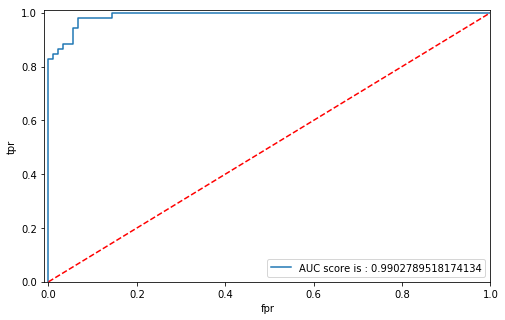

AUC Score for logistic regression is 0.9902789518174134


In [62]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

fpr_logr, tpr_logr,_ = roc_curve(y_test,yprob_test_logr[:,1])
auc_logr = auc(fpr_logr, tpr_logr)

fig = plt.figure(figsize = (8,5))

plt.plot(fpr_logr,tpr_logr, label = 'AUC score is : ' + str(auc_logr))
plt.xlabel('fpr', fontsize = 10)
plt.ylabel('tpr', fontsize = 10)
plt.xlim([-0.01,1])
plt.ylim([0,1.01])
plt.legend()

plt.plot([0,1],[0,1],'r--')
plt.show()

print ('AUC Score for logistic regression is', roc_auc_score(y_test,yprob_test_logr[:,1]))

### 5.3 Investigate wih Polynomial features (Optional)

In [63]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
X_train_poly= poly.fit_transform(X_train)
X_test_poly= poly.fit_transform(X_test)

logr_poly = LogisticRegression(random_state=0)

logr_poly.fit(X_train_poly,y_train)
ypred_train_logr_poly = logr_poly.predict(X_train_poly)
ypred_test_logr_poly = logr_poly.predict(X_test_poly)
yprob_test_logr_poly = logr_poly.predict_proba(X_test_poly)

C:\Users\palle\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [64]:
print ('confusion matrix for training data is : \n', confusion_matrix(y_train,ypred_train_logr_poly), '\n', '\n')
print ('confusion_matrix for test data is : \n', confusion_matrix(y_test,ypred_test_logr_poly), '\n')
print ('confusion_matrix for test data with threshold od 0.2 is : \n', confusion_matrix(y_test,yprob_test_logr_poly[:,1] > 0.2), '\n')

confusion matrix for training data is : 
 [[262   4]
 [  8 152]] 
 

confusion_matrix for test data is : 
 [[86  5]
 [ 3 49]] 

confusion_matrix for test data with threshold od 0.2 is : 
 [[85  6]
 [ 1 51]] 



In [65]:
print ('AUC Score for logistic regressionis', roc_auc_score(y_test,yprob_test_logr[:,1]))

AUC Score for logistic regressionis 0.9902789518174134


In [66]:
print ('AUC Score for logistic regression with polynomial features is', roc_auc_score(y_test,yprob_test_logr_poly[:,1]))

AUC Score for logistic regression with polynomial features is 0.9934488588334742


**Results improved slightly better with polynomial features with respect to AUC score**

### 5.4 Decision Trees (Optional)

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
dt = DecisionTreeClassifier(random_state=15)
dt.fit(X_train,y_train)

ypred_train_dt = dt.predict(X_train) # Predictions on training data for DecisionTreeClassifer()
ypred_test_dt = dt.predict(X_test) # Predictions on testing data for DecisionTreeClassifer()

print ('confusion matrix for training data for default threshold of 0.5  is : \n', confusion_matrix(y_train,ypred_train_dt), '\n', '\n')
print ('confusion_matrix for test data for default threshol of 0.5 is : \n', confusion_matrix(y_test,ypred_test_dt), '\n')

confusion matrix for training data for default threshold of 0.5  is : 
 [[266   0]
 [  0 160]] 
 

confusion_matrix for test data for default threshol of 0.5 is : 
 [[82  9]
 [ 3 49]] 



**Scores on test data for decision Trees**

In [69]:
yprob_test_dt = dt.predict_proba(X_test) # probability predictions based on DecisionTree Classifier

# print ('Accuracy for test data is : \n', accuracy_score(y_test,ypred_test_dt), '\n')
# print ('Recall for test data is : \n', recall_score(y_test,ypred_test_dt), '\n')
# print ('Precision for test data is : \n', precision_score(y_test,ypred_test_dt), '\n')
print ('AUC score for test data with DT is : \n', roc_auc_score(y_test,yprob_test_dt[:,1]))

AUC score for test data with DT is : 
 0.9217032967032966


## 5.5 RandomForest (Optional)

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)

ypred_train_rf = rf.predict(X_train) # Predictions on training data for RandomForest
ypred_test_rf = rf.predict(X_test) # Predictions on training data for RandomForest

print ('confusion matrix for training data for default threshold is : \n', confusion_matrix(y_train,ypred_train_rf), '\n', '\n')
print ('confusion_matrix for test data for default threshold is : \n', confusion_matrix(y_test,ypred_test_rf), '\n')

confusion matrix for training data for default threshold is : 
 [[265   1]
 [  1 159]] 
 

confusion_matrix for test data for default threshold is : 
 [[88  3]
 [ 1 51]] 



C:\Users\palle\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


**Scores on test data for RandomForest**

In [72]:
yprob_test_rf = rf.predict_proba(X_test) # probability predictions based on RandomForest

# print ('Scores for default threshold value of: ', 0.5, '\n')
# print ('Accuracy for test data is : \n', accuracy_score(y_test,ypred_test_rf), '\n')
# print ('Recall for test data is : \n', recall_score(y_test,ypred_test_rf), '\n')
# print ('Precision for test data is : \n', precision_score(y_test,ypred_test_rf), '\n')
print ('AUC score for test data with RF is : \n', roc_auc_score(y_test,yprob_test_rf[:,1]))

AUC score for test data with RF is : 
 0.9969357565511412


## 5.6 Comparing AUC scores for all the models (Optional)

In [73]:
auc_score = []
auc_score.append(roc_auc_score(y_test,yprob_test_logr[:,1]))
auc_score.append(roc_auc_score(y_test,yprob_test_logr_poly[:,1]))
auc_score.append(roc_auc_score(y_test,yprob_test_dt[:,1]))
auc_score.append(roc_auc_score(y_test,yprob_test_rf[:,1]))
auc_scores = pd.Series(auc_score, index = ['Logistic', 'Logistic with Poly', 'DT', 'RF'])
auc_scores

Logistic              0.990279
Logistic with Poly    0.993449
DT                    0.921703
RF                    0.996936
dtype: float64